In [25]:
from skimage.io import imread
import os 
import matplotlib.pyplot as plt
import numpy as np

In [67]:
dir = '../data/actin_kymo' 
listdir = os.listdir(dir)
tif_files = [f for f in listdir if f.endswith('tif')]

rep_nums = [int(f.split('_')[0][3:]) for f in tif_files]

# sort tif_files by rep_nums
tif_files = [x for _, x in sorted(zip(rep_nums, tif_files))]

print(tif_files)

['rep1_roi4_200px_wide_kymo.tif', 'rep2_roi4_200px_wide_kymo.tif', 'rep3_roi4_200px_wide_kymo.tif', 'rep4_roi4_200px_wide_kymo.tif', 'rep5_roi4_200px_wide_kymo.tif', 'rep6_roi4_200px_wide_kymo.tif', 'rep7_roi4_200px_wide_kymo.tif', 'rep8_roi4_200px_wide_kymo.tif', 'rep9_roi4_200px_wide_kymo.tif', 'rep10_roi4_200px_wide_kymo.tif', 'rep56_roi4_200px_wide_kymo.tif', 'rep67_roi4_200px_wide_kymo.tif', 'rep68_roi4_200px_wide_kymo.tif', 'rep72_roi4_200px_wide_kymo.tif', 'rep76_roi4_200px_wide_kymo.tif', 'rep77_roi4_200px_wide_kymo.tif', 'rep80_roi4_200px_wide_kymo.tif', 'rep81_roi4_200px_wide_kymo.tif', 'rep82_roi4_200px_wide_kymo.tif', 'rep83_roi4_200px_wide_kymo.tif', 'rep84_roi4_200px_wide_kymo.tif', 'rep87_roi4_200px_wide_kymo.tif', 'rep88_roi4_200px_wide_kymo.tif', 'rep96_roi4_200px_wide_kymo.tif', 'rep97_roi4_200px_wide_kymo.tif', 'rep103_roi4_200px_wide_kymo.tif', 'rep105_roi4_200px_wide_kymo.tif']


In [68]:
def compute_depletion_widths(density, axis, lower_by=0.1):
    threshold = np.min(density) + (np.max(density[20:30])- np.min(density) - lower_by)
    selection = density < threshold
    selection = selection & (np.arange(len(density)) > 20) & (np.arange(len(density)) < 50)
    width = np.sum(selection)/2
    
    axis.plot(density)
    threshold_line = np.full(len(density), threshold)
    threshold_masked = np.ma.masked_where(~selection, threshold_line)
    
    axis.plot(threshold_masked, 'r--', linewidth=1)

    return width

(299, 1020)
(299, 68)


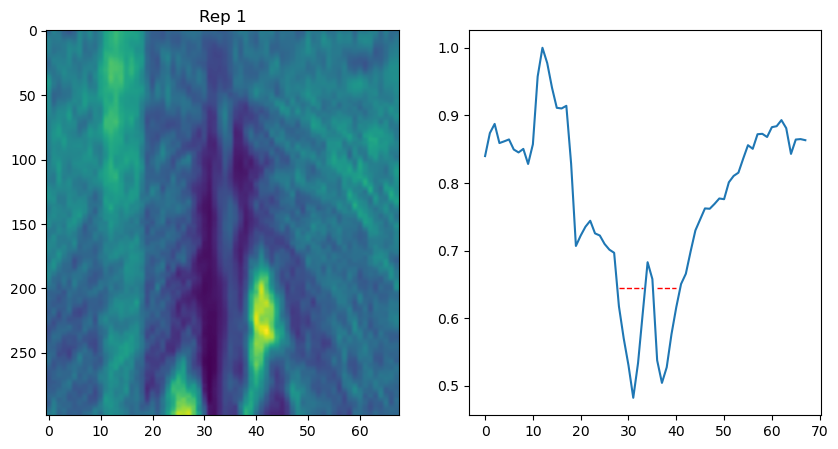

(299, 1020)
(299, 68)


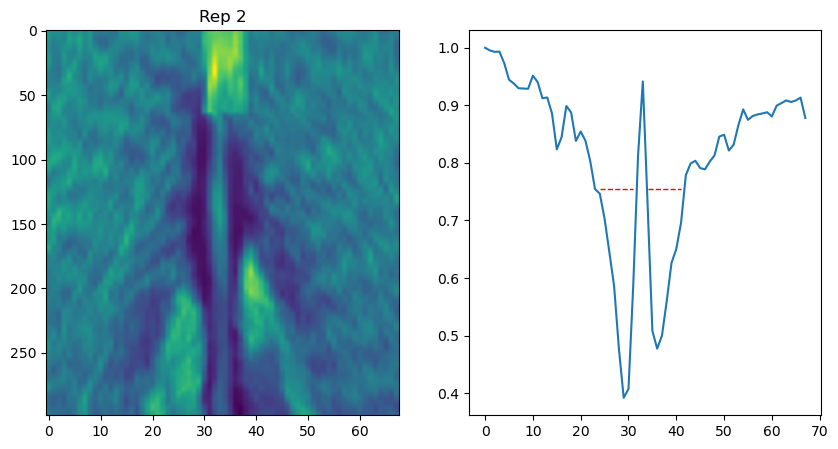

(299, 1020)
(299, 68)


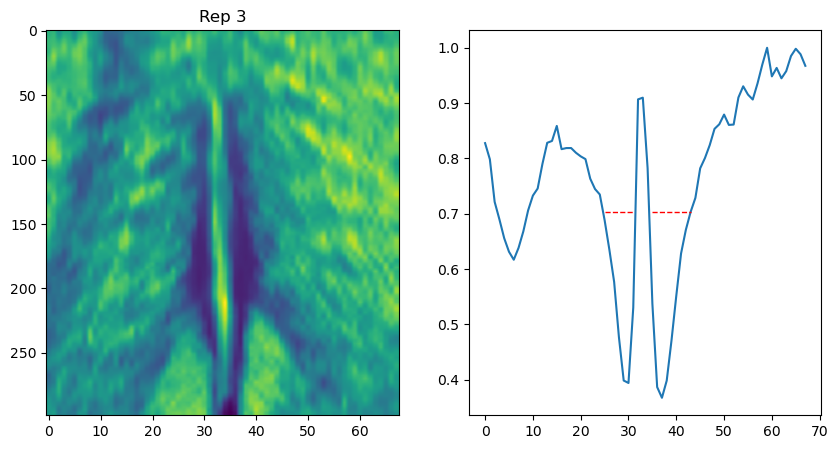

(299, 1020)
(299, 68)


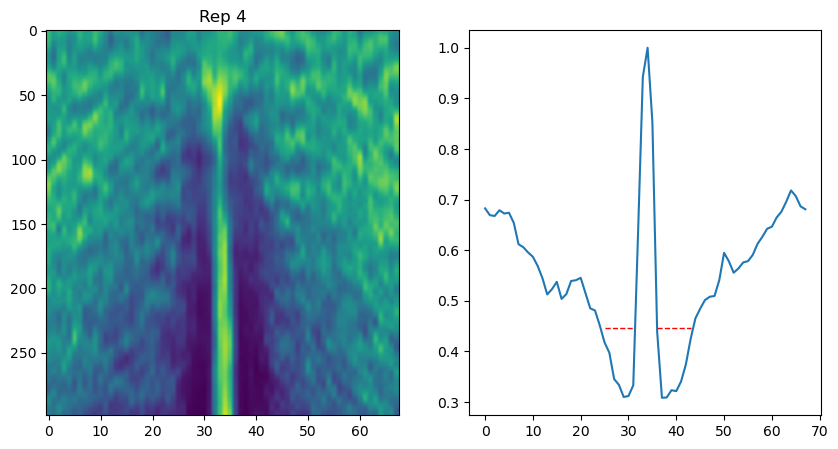

(299, 1020)
(299, 68)


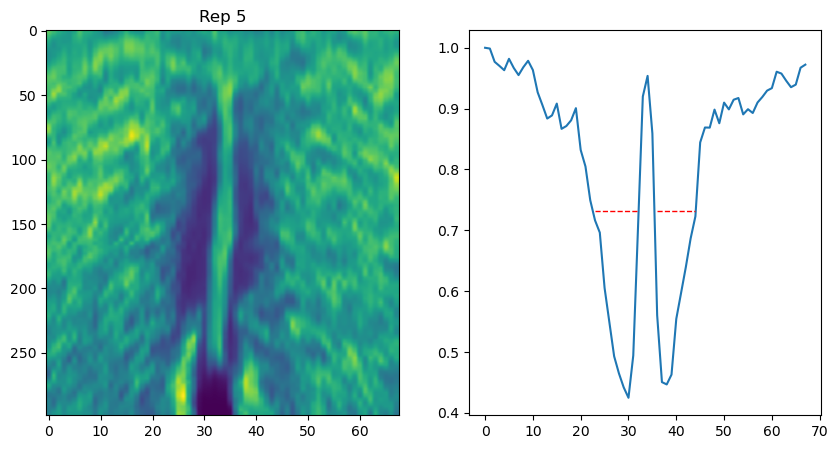

(299, 1020)
(299, 68)


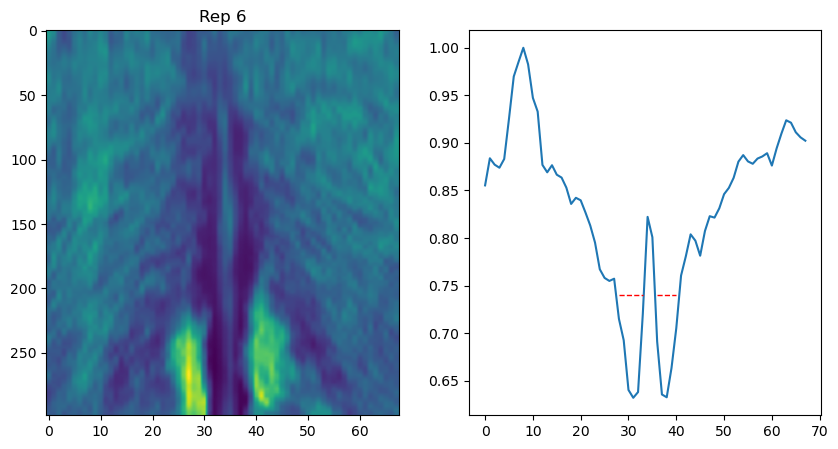

(299, 1020)
(299, 68)


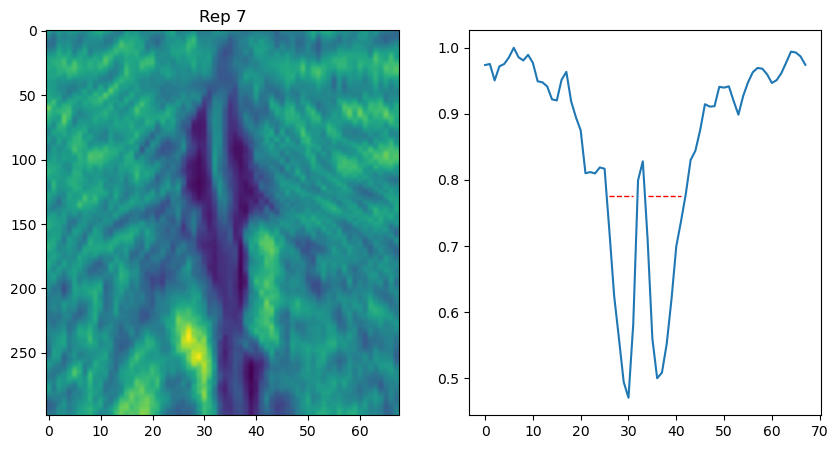

(299, 1020)
(299, 68)


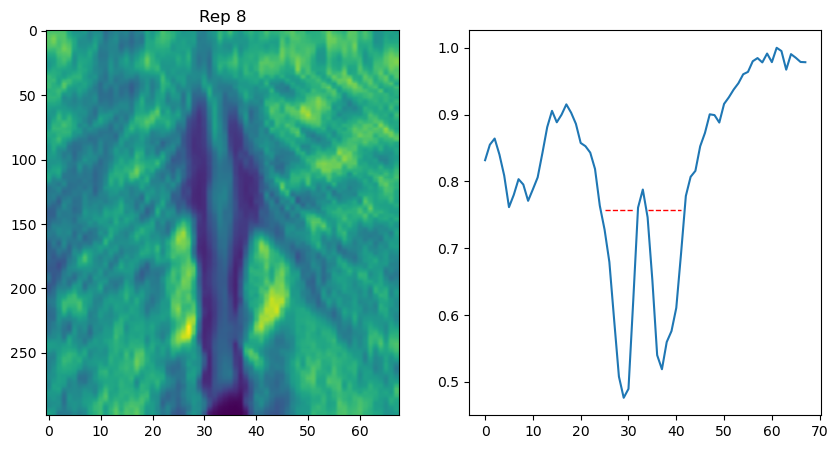

(299, 1020)
(299, 68)


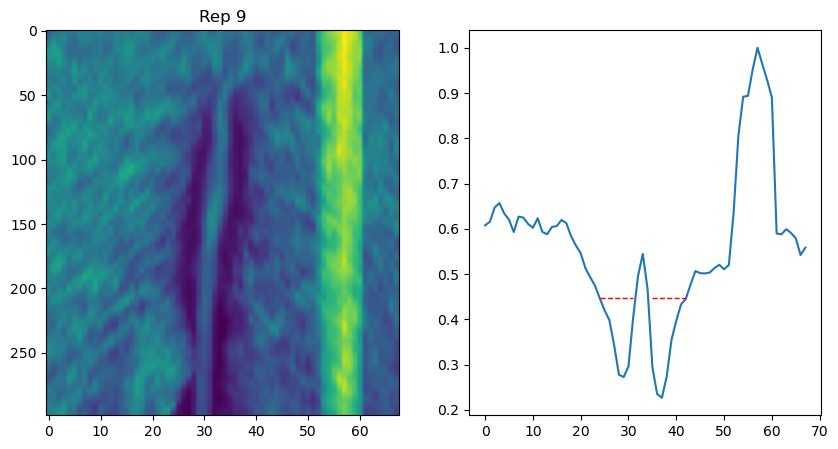

(299, 1020)
(299, 68)


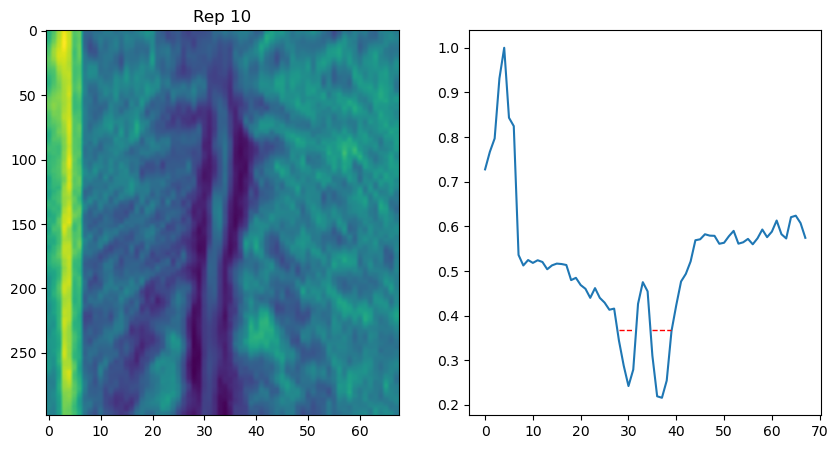

(488, 1020)
(488, 68)


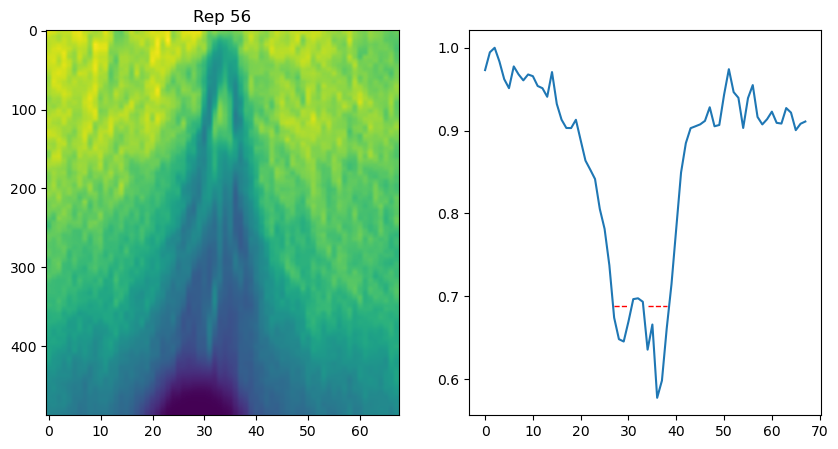

(955, 1020)
(955, 68)


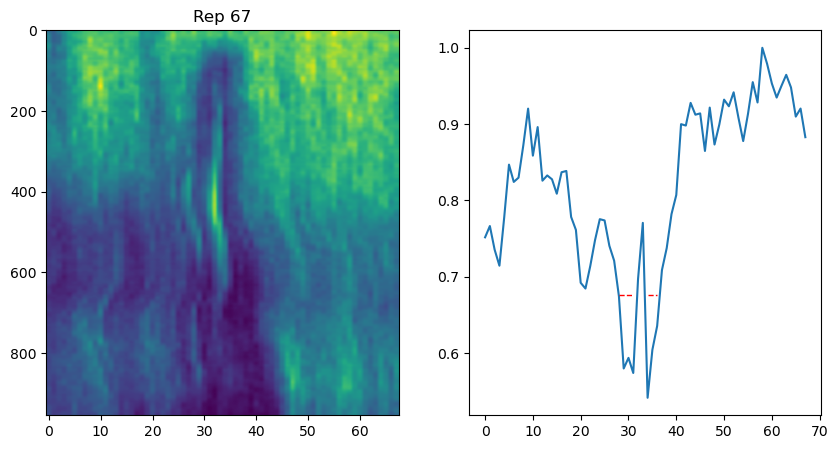

68 excluded
(488, 1020)
(488, 68)


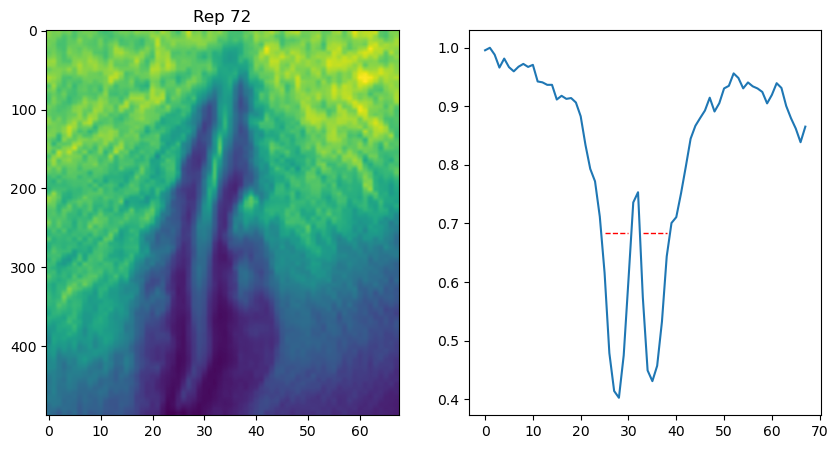

(777, 1020)
(777, 68)


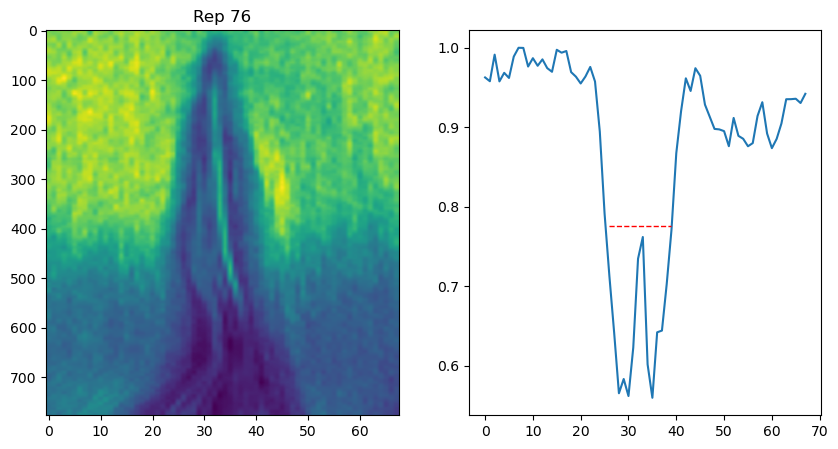

(435, 1020)
(435, 68)


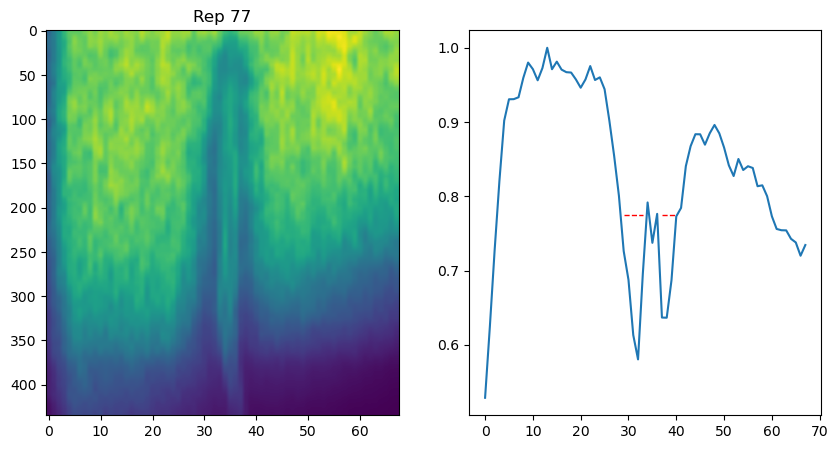

(619, 1020)
(619, 68)


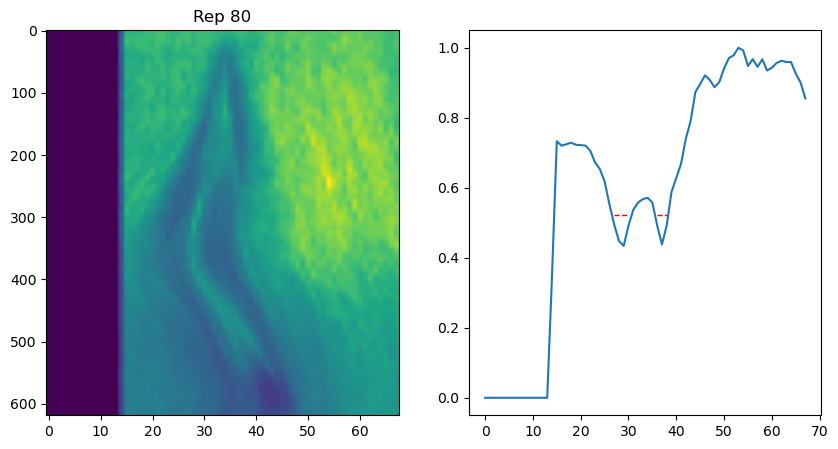

81 excluded
(378, 1020)
(378, 68)


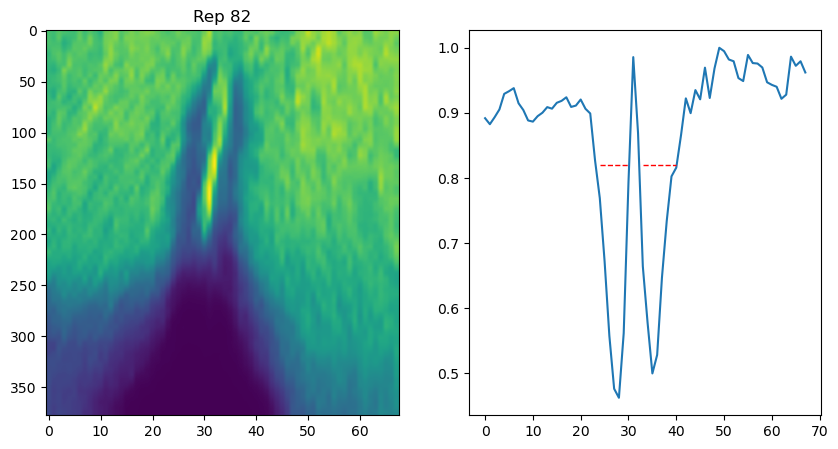

83 excluded
84 excluded
(544, 1020)
(544, 68)


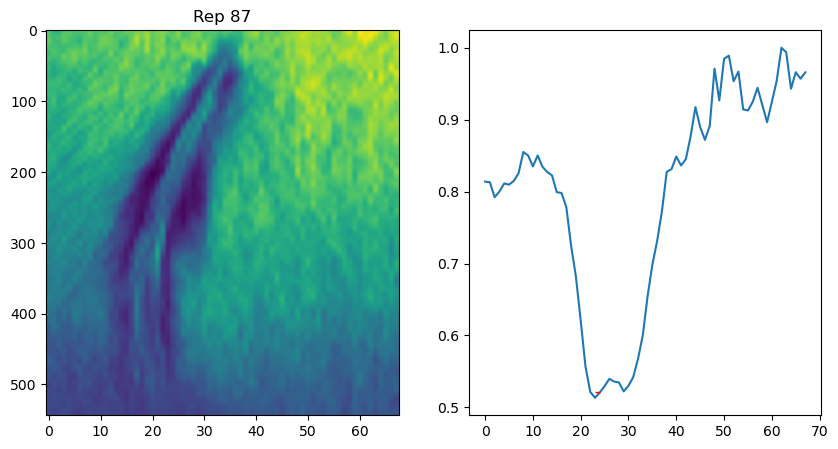

88 excluded
(484, 1020)
(484, 68)


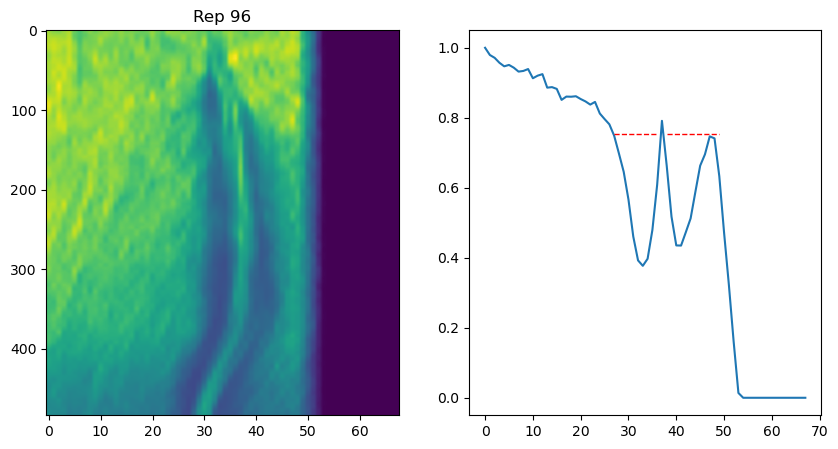

(493, 1020)
(493, 68)


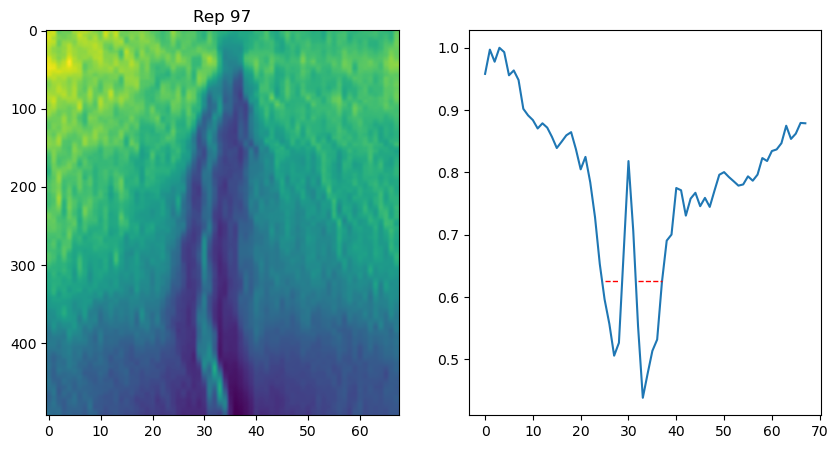

(761, 1020)
(761, 68)


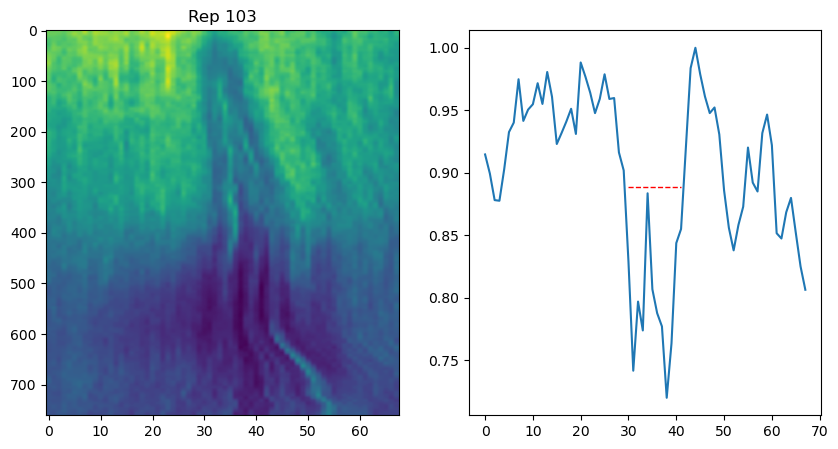

105 excluded


In [83]:
ranges = [(70, 150), (70, 150), (100, 200), (200, 300), (100, 200), 
          (100, 200), (50, 150), (70, 150), (70, 150), (100, 150), 
          (150, 250), (200, 300), (250, 350), (150, 250), (150, 350), (150, 300), (150, 250), 
          (150, 250), (100, 200), (100, 250), (100, 200), (100, 200), (150, 250), 
          (150, 350), (300, 400), (150, 200), (150, 250)]

excludes = [68, 81, 83, 84, 88, 105]
lower = [56, 72, 76, 77, 80, 97]

furrow_widths = {}

for tif, (start, end) in zip(tif_files, ranges):
    rep_num = int(tif.split('_')[0][3:])

    if rep_num in excludes:
        print(rep_num, 'excluded')
        furrow_widths[rep_num] = 0
        continue
    img = imread(os.path.join(dir, tif))

    # average over every 15 columns

    dim2 = img.shape[1] // 15 * 15
    img = img[:, :dim2]

    print(img.shape) 
    img_reshaped = img.reshape(img.shape[0], -1, 15)
    img_avg = img_reshaped.mean(axis=2)
    print(img_avg.shape)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img_avg, aspect='auto')
    axes[0].set_title(f'Rep {rep_num}')

    mean_density = img_avg[start:end, :].mean(axis=0)/img_avg[start:end, :].mean(axis=0).max()
    if rep_num in lower:
        width = compute_depletion_widths(mean_density, axes[1], lower_by=0.2)
    else: 
        width = compute_depletion_widths(mean_density, axes[1], lower_by=0.1)
    furrow_widths[rep_num] = width 
    plt.show() 

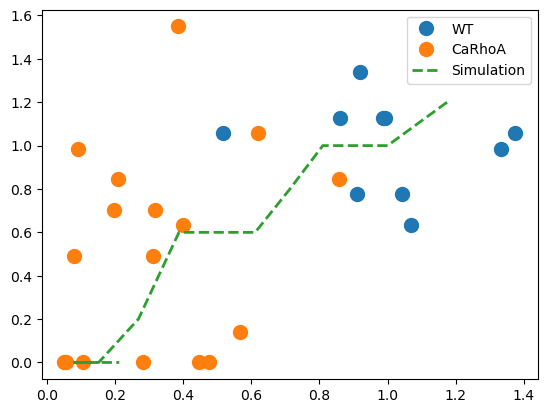

In [84]:
velocity_dic = { 
1	:4.006984421,
2	:4.373186761,
3	:3.792165342,
4	:2.272906508,
5	:4.053958683,
6	:4.593747355,
7	:5.874932102,
8	:6.063520589,
9	:4.350455061,
10	:4.706483501,
56	:1.763044973,
67	:0.341262915,
68	:0.222373193,
72	:3.78553019,
76	:0.393564151,
77	:0.861978169,
80	:1.365524839,
81	:0.248005656,
82	:2.728142273,
83	:0.469032564,
84	:2.096262202,
87	:2.491341296,
88	:1.971742614,
96	:1.69989256,
97	:1.402504482,
103	:0.913830829,
105	:1.236942175,
}

res = np.load('sim_data/caRhoA.npz')
velocities = res['velocities']
widths = res['widths']


WT_keys = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

v_WT_mean = np.mean([velocity_dic[k] for k in WT_keys])
dz_w_WT_mean = np.mean([furrow_widths[k] for k in WT_keys])

v_WT = np.array([velocity_dic[k] for k in WT_keys])/v_WT_mean
v_CaRhoA = np.array([velocity_dic[k] for k in velocity_dic.keys() if k not in WT_keys])/v_WT_mean

dz_WT = np.array([furrow_widths[k] for k in WT_keys])/dz_w_WT_mean
dz_CaRhoA = np.array([furrow_widths[k] for k in velocity_dic.keys() if k not in WT_keys])/dz_w_WT_mean


plt.plot(v_WT, dz_WT, 'o', markersize=10, label='WT')
plt.plot(v_CaRhoA, dz_CaRhoA, 'o', markersize=10, label='CaRhoA')
plt.plot(velocities, widths, '--', linewidth=2, label='Simulation')
plt.legend()
plt.show()

In [85]:
np.savez('sim_data/exp_data.npz', v_WT=v_WT, v_CaRhoA=v_CaRhoA, dz_WT=dz_WT, dz_CaRhoA=dz_CaRhoA)